<a href="https://colab.research.google.com/github/Parkshinhyang/Programmers/blob/main/%EA%B2%8C%EC%9E%84_%EB%A7%B5_%EC%B5%9C%EB%8B%A8%EA%B1%B0%EB%A6%AC(Lv_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 문제 - 게임 맵 최단거리
[문제 링크](https://school.programmers.co.kr/learn/courses/30/lessons/1844)

## 문제 설명

ROR 게임은 두 팀으로 나누어서 진행하며, 상대 팀 진영을 먼저 파괴하면 이기는 게임입니다. 따라서, 각 팀은 상대 팀 진영에 최대한 빨리 도착하는 것이 유리합니다.

지금부터 당신은 한 팀의 팀원이 되어 게임을 진행하려고 합니다. 다음은 5 x 5 크기의 맵에, 당신의 캐릭터가 (행: 1, 열: 1) 위치에 있고, 상대 팀 진영은 (행: 5, 열: 5) 위치에 있는 경우의 예시입니다.

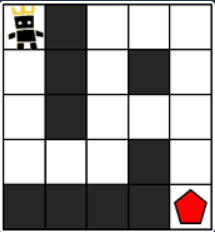

위 그림에서 검은색 부분은 벽으로 막혀있어 갈 수 없는 길이며, 흰색 부분은 갈 수 있는 길입니다. 캐릭터가 움직일 때는 동, 서, 남, 북 방향으로 한 칸씩 이동하며, 게임 맵을 벗어난 길은 갈 수 없습니다.
아래 예시는 캐릭터가 상대 팀 진영으로 가는 두 가지 방법을 나타내고 있습니다.

- 첫 번째 방법은 11개의 칸을 지나서 상대 팀 진영에 도착했습니다.

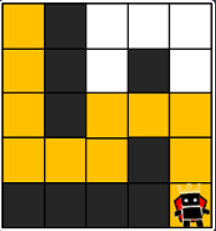

- 두 번째 방법은 15개의 칸을 지나서 상대팀 진영에 도착했습니다.

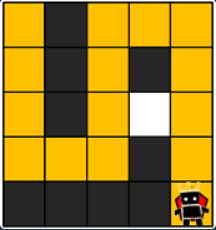

위 예시에서는 첫 번째 방법보다 더 빠르게 상대팀 진영에 도착하는 방법은 없으므로, 이 방법이 상대 팀 진영으로 가는 가장 빠른 방법입니다.

만약, 상대 팀이 자신의 팀 진영 주위에 벽을 세워두었다면 상대 팀 진영에 도착하지 못할 수도 있습니다. 예를 들어, 다음과 같은 경우에 당신의 캐릭터는 상대 팀 진영에 도착할 수 없습니다.

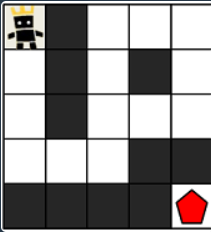

게임 맵의 상태 maps가 매개변수로 주어질 때, 캐릭터가 상대 팀 진영에 도착하기 위해서 지나가야 하는 칸의 개수의 최솟값을 return 하도록 solution 함수를 완성해주세요. 단, 상대 팀 진영에 도착할 수 없을 때는 -1을 return 해주세요.

## 제한사항

maps는 n x m 크기의 게임 맵의 상태가 들어있는 2차원 배열로, n과 m은 각각 1 이상 100 이하의 자연수입니다.
n과 m은 서로 같을 수도, 다를 수도 있지만, n과 m이 모두 1인 경우는 입력으로 주어지지 않습니다.
maps는 0과 1로만 이루어져 있으며, 0은 벽이 있는 자리, 1은 벽이 없는 자리를 나타냅니다.
처음에 캐릭터는 게임 맵의 좌측 상단인 (1, 1) 위치에 있으며, 상대방 진영은 게임 맵의 우측 하단인 (n, m) 위치에 있습니다.

## 입출력 예

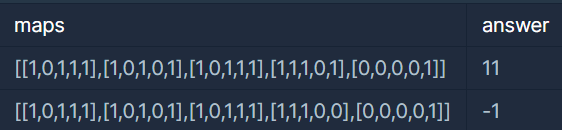

## 입출력 예 설명

### 입출력 예 #1

주어진 데이터는 다음과 같습니다.

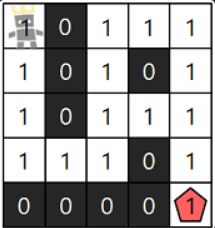

캐릭터가 적 팀의 진영까지 이동하는 가장 빠른 길은 다음 그림과 같습니다.

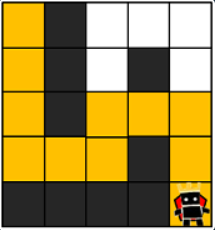

따라서 총 11칸을 캐릭터가 지나갔으므로 11을 return 하면 됩니다.

### 입출력 예 #2

문제의 예시와 같으며, 상대 팀 진영에 도달할 방법이 없습니다. 따라서 -1을 return 합니다.

In [11]:
from collections import deque

def solution(maps):

    ## 상, 하, 좌, 우
    dx = [0, 0, -1, 1]
    dy = [1, -1, 0, 0]

    def bfs(x, y):
        queue = deque()
        queue.append([x, y])

        ## queue가 비어있지 않으면
        while queue:
            x, y = queue.popleft()

            ## 지정된 곳에서 상, 하, 좌, 우를 탐색.
            for i in range(4):
                nx = dx[i] + x
                ny = dy[i] + y

                if nx < 0 or nx >= len(maps) or ny < 0 or ny >= len(maps[0]):
                    continue
                if maps[nx][ny] == 0:
                    continue
                ## 탐색한 곳이 벽이 아니라면 그 곳에 전의 위치의 값을 더하고 queue에 위치를 저장.
                if maps[nx][ny] == 1:
                    maps[nx][ny] = maps[x][y] + 1
                    queue.append([nx, ny])
        if maps[len(maps) - 1][len(maps[0]) - 1] != 1:
            return maps[len(maps) - 1][len(maps[0]) - 1]
        else:
            return -1
    return bfs(0, 0)

solution([[1,0,1,1,1],[1,0,1,0,1],[1,0,1,1,1],[1,1,1,0,1],[0,0,0,0,1]])

11